# Sepsis Survival Prediction Using Decision Trees

**Code authored by**: Shawhin Talebi <br>
**Article link**: https://medium.com/towards-data-science/decision-trees-introduction-intuition-dac9592f4b7f <br>
**Data source**: 
- UCI: https://archive.ics.uci.edu/ml/datasets/Sepsis+survival+minimal+clinical+records
- Chicco, D., Jurman, G. Survival prediction of patients with sepsis from age, sex, and septic episode number alone. Sci Rep 10, 17156 (2020). https://doi.org/10.1038/s41598-020-73558-3

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

### Data prep

In [2]:
df = pd.read_csv('raw/s41598-020-73558-3_sepsis_survival_primary_cohort.csv')

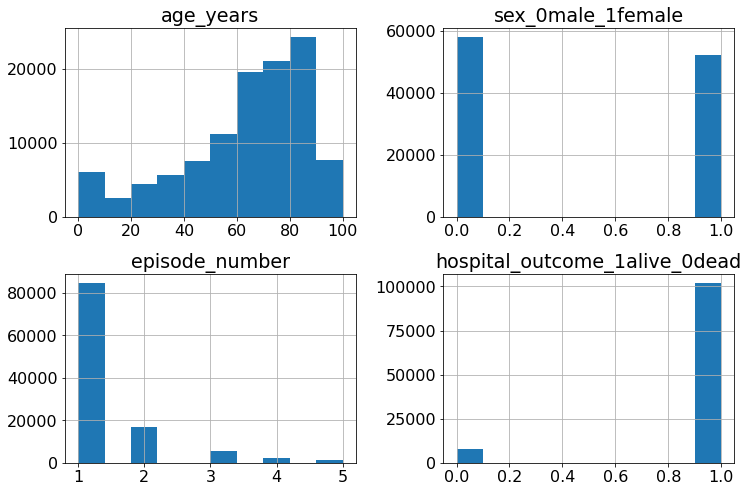

In [3]:
plt.rcParams.update({'font.size': 16})

df.hist(figsize=(12,8))
plt.savefig('visuals/raw_histograms.png',facecolor='white',bbox_inches="tight")

#### Balance data using SMOTE

In [4]:
# define predictor and target variable names
X_var_names = df.columns[:3]
y_var_name = df.columns[3]

# create predictor and target arrays
X = df[X_var_names]
y = df[y_var_name]

# oversample minority class using smote
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

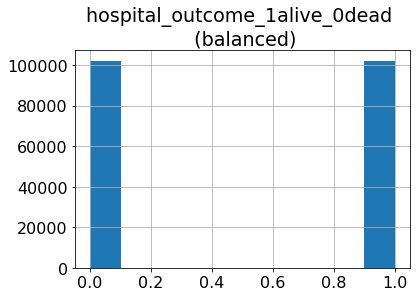

In [5]:
y_resampled.hist(figsize=(6,4))
plt.title('hospital_outcome_1alive_0dead \n (balanced)')
plt.savefig('visuals/balanced_outcome_histogram.png',facecolor='white',bbox_inches="tight")

#### Train-test split

In [6]:
# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [7]:
X_train.shape

(163358, 3)

In [8]:
X_test.shape

(40840, 3)

### Decision tree

In [9]:
# train model
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

##### Display decision tree

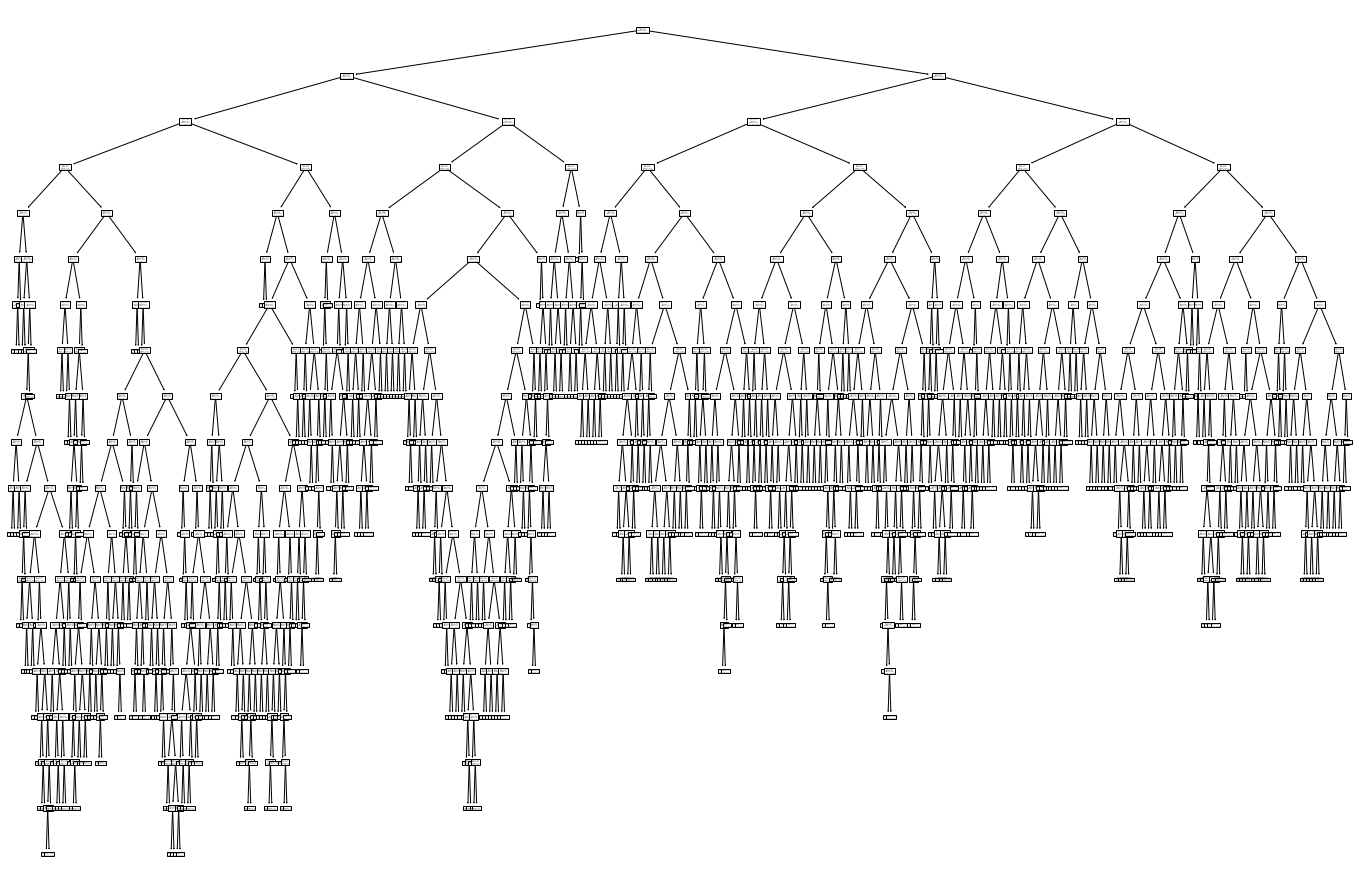

In [10]:
plt.figure(figsize=(24,16))

tree.plot_tree(clf)
plt.savefig('visuals/fully_grown_decision_tree.png',facecolor='white',bbox_inches="tight")
plt.show()

##### Evaluate performance

In [11]:
def evaluateModel(clf, X, y):

    # confusion matrix
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dead', 'alive'])
    cm_disp.plot()

    # print metrics
    print("Precision = " + str(np.round(precision_score(y, y_pred),3)))
    print("Recall = " + str(np.round(recall_score(y, y_pred),3)))
    print("F1 = " + str(np.round(f1_score(y, y_pred),3)))

Precision = 0.722
Recall = 0.527
F1 = 0.609


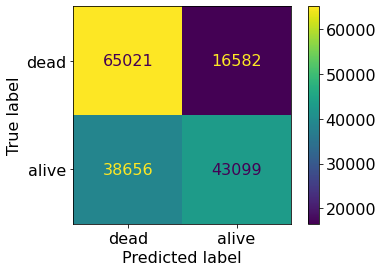

In [12]:
evaluateModel(clf, X_train, y_train)
plt.savefig('visuals/fully_grown_decision_tree_training_performance.png',facecolor='white',bbox_inches="tight")

Precision = 0.718
Recall = 0.528
F1 = 0.609


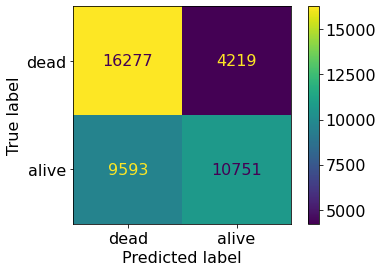

In [13]:
evaluateModel(clf, X_test, y_test)
plt.savefig('visuals/fully_grown_decision_tree_testing_performance.png',facecolor='white',bbox_inches="tight")

### Hyperparameter tuning

In [14]:
# train model
clf_tuned = tree.DecisionTreeClassifier(random_state=0, max_depth=3) # set max depth to 3
clf_tuned = clf_tuned.fit(X_train, y_train)

##### Display decision tree

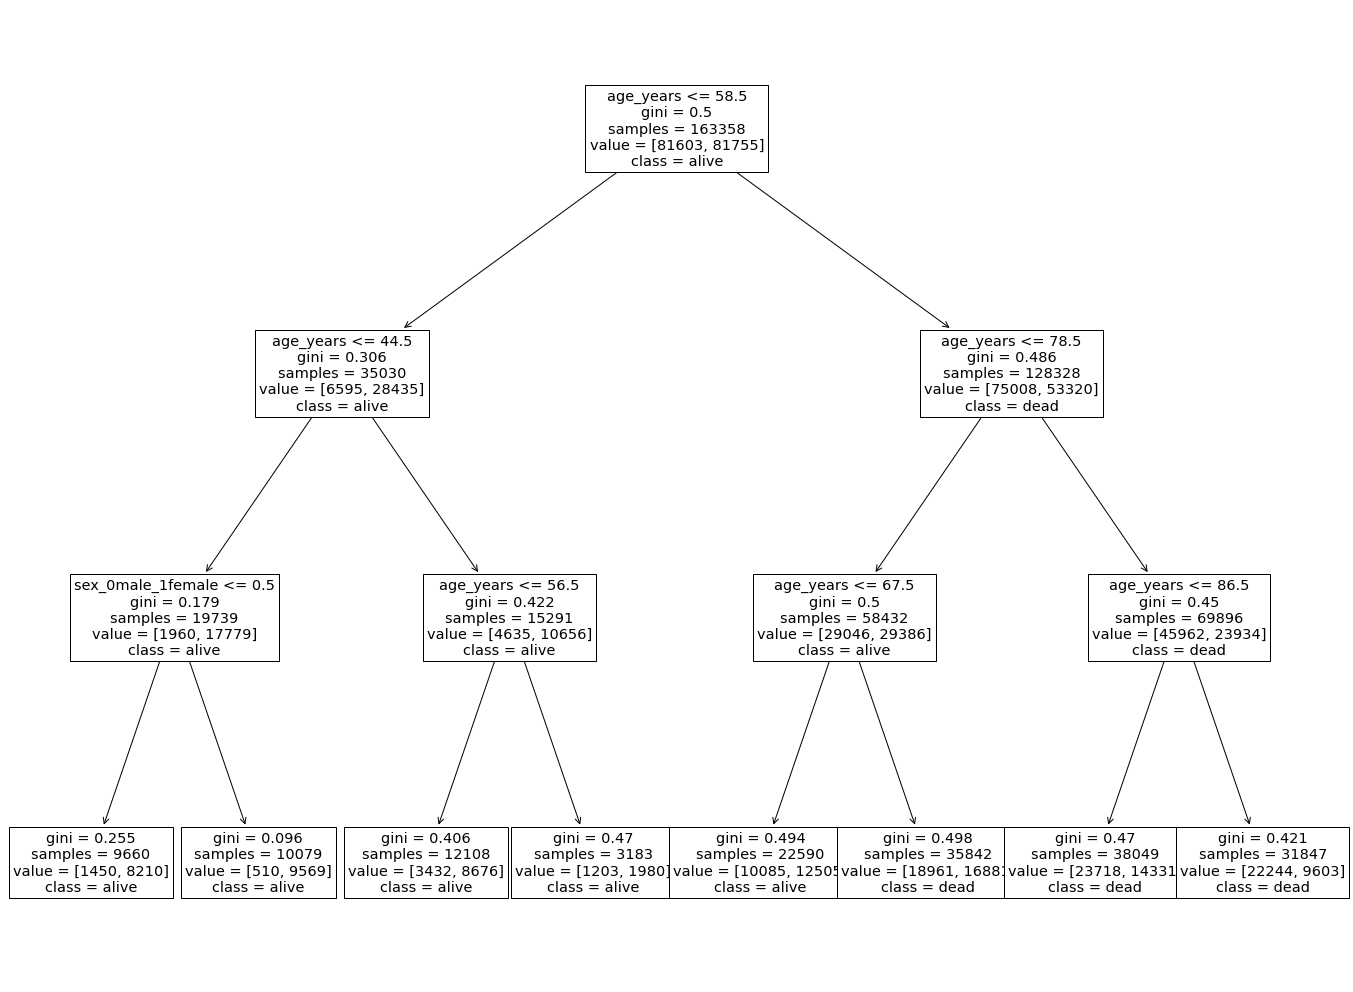

In [15]:
plt.figure(figsize=(24,18))

tree.plot_tree(clf_tuned,feature_names=X_var_names, class_names=['dead', 'alive'], fontsize=14.5)
plt.savefig('visuals/tuned_decision_tree.png',facecolor='white',bbox_inches="tight")
plt.show()

##### Evaluate performance

Precision = 0.711
Recall = 0.501
F1 = 0.587


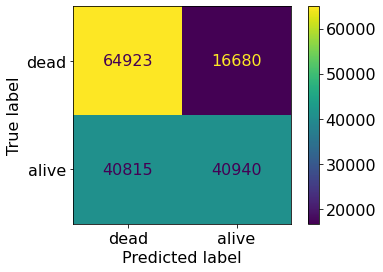

In [16]:
evaluateModel(clf_tuned, X_train, y_train)
plt.savefig('visuals/tuned_decision_tree_training_performance.png',facecolor='white',bbox_inches="tight")

Precision = 0.709
Recall = 0.503
F1 = 0.589


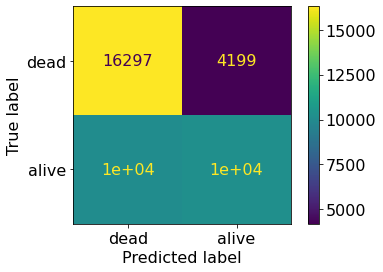

In [17]:
evaluateModel(clf_tuned, X_test, y_test)
plt.savefig('visuals/tuned_decision_tree_testing_performance.png',facecolor='white',bbox_inches="tight")